In [52]:
import pandas
from pathlib import Path
import numpy
import re
import matplotlib.pyplot as plt

In [37]:
channels = [1, 4, 6, 7, 11]
data_dir = Path("/data/Experiment_data/weizmann/EhV/high_time_res/High/H1_T8_subset/")

In [38]:
channels_re = "|".join([str(c) for c in channels])
regex = f".*\/(?P<id>[0-9]+)_Ch(?P<channel>({channels_re}))\.ome\.tif$"

In [39]:
def match(p):
    m = re.match(regex, str(p)).groupdict()
    if m is not None:
        return {**m, **dict(path=str(p))}
    else:
        return None
    
matches = list(filter(lambda r: r is not None, map(match, data_dir.glob("*.tif*"))))
df = pandas.DataFrame.from_dict(matches)

In [40]:
df = df.pivot(index="id", columns="channel", values="path")

In [42]:
for channel in channels:
    print(df.iloc[0][str(channel)])

/data/Experiment_data/weizmann/EhV/high_time_res/High/H1_T8_subset/1000_Ch1.ome.tif
/data/Experiment_data/weizmann/EhV/high_time_res/High/H1_T8_subset/1000_Ch4.ome.tif
/data/Experiment_data/weizmann/EhV/high_time_res/High/H1_T8_subset/1000_Ch6.ome.tif
/data/Experiment_data/weizmann/EhV/high_time_res/High/H1_T8_subset/1000_Ch7.ome.tif
/data/Experiment_data/weizmann/EhV/high_time_res/High/H1_T8_subset/1000_Ch11.ome.tif


In [43]:
import tifffile
import logging

In [44]:
logging.getLogger("tifffile").setLevel(logging.ERROR)

In [46]:
df.iloc[0][[str(c) for c in channels]]

channel
1     /data/Experiment_data/weizmann/EhV/high_time_r...
4     /data/Experiment_data/weizmann/EhV/high_time_r...
6     /data/Experiment_data/weizmann/EhV/high_time_r...
7     /data/Experiment_data/weizmann/EhV/high_time_r...
11    /data/Experiment_data/weizmann/EhV/high_time_r...
Name: 1000, dtype: object

In [85]:
from libtiff import TIFF

Generating '/home/maximl/miniconda3/envs/py3/lib/python3.8/site-packages/libtiff/tiff_h_4_1_0.py' from '/home/maximl/miniconda3/envs/py3/lib/../include/tiff.h'


In [90]:
data = tifffile.imread(df.iloc[0][[str(c) for c in channels]].values.tolist())
data[4].mean()

4310.170220588236

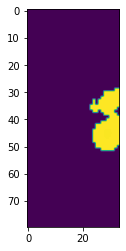

In [95]:
plt.imshow(data[4])